In [43]:
pip install tushare

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install alphalens

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [45]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tushare as ts
ts.set_token('')
pro=ts.pro_api()
data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
data


,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,ST国华,深圳,软件服务,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427
...,...,...,...,...,...,...
5093,873223.BJ,873223,荣亿精密,None,None,20220609
5094,873305.BJ,873305,九菱科技,None,None,20221221
5095,873339.BJ,873339,恒太照明,None,None,20221117
5096,873527.BJ,873527,夜光明,None,None,20221027


In [47]:
data_code=data[:100]
data_code
#对数据中的行业进行编码并生成字典
t=data_code.industry.unique()
tlen=range(0,len(t))
in_id=dict(zip(tlen,t))
in_id_r=dict(zip(t,tlen))
data_code['in_id']=data_code['industry'].map(in_id_r)
code_sec=dict(zip(data_code.ts_code,data_code.in_id))


In [48]:
df=pro.trade_cal(exchange='SSE',start_date='2021-01-01',end_date='2022-12-31')
df=df.set_index('cal_date')
df['399300']=df.is_open
df=df[['399300']]
for i in data_code.ts_code:
    dfn=pro.daily(ts_code=i,start_date='2021-01-01',end_date='2022-12-31')
    dfn=dfn.set_index('trade_date')
    df[i]=dfn.open
import pandas as pd
df.index=pd.to_datetime(df.index)
del df['399300']
df


,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,000425.SZ,000426.SZ,000428.SZ,000429.SZ,000430.SZ,000488.SZ,000498.SZ,000501.SZ,000503.SZ,000504.SZ
cal_date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,16.86,19.14,19.55,2.29,4.39,5.91,2.72,14.10,3.74,11.50,...,5.99,7.25,3.16,7.25,5.70,7.23,6.12,10.49,16.99,18.24
2021-12-30,16.76,19.35,19.38,2.29,4.39,5.81,2.63,14.25,3.75,11.46,...,6.00,7.28,3.12,7.20,5.64,7.19,6.17,10.51,14.95,18.24
2021-12-29,17.16,19.65,19.57,2.30,4.38,5.75,2.69,14.25,3.79,11.59,...,6.04,7.28,3.02,7.19,5.52,7.17,6.24,10.50,14.00,18.42
2021-12-28,17.22,19.52,18.95,2.26,4.43,5.81,2.83,13.98,3.77,11.70,...,6.01,7.24,3.06,7.19,5.51,7.15,6.44,10.72,14.58,18.20
2021-12-27,17.33,19.79,19.03,2.24,4.38,5.87,2.88,14.12,3.73,11.77,...,5.99,7.33,2.99,7.17,5.39,7.13,6.37,10.79,15.13,17.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,18.40,27.78,21.02,2.52,5.50,5.64,2.52,7.80,4.06,11.92,...,5.52,8.00,2.59,6.03,4.71,6.92,4.81,11.61,9.00,12.62
2021-01-04,19.10,28.40,20.69,2.53,5.64,6.27,2.54,7.52,4.15,12.20,...,5.38,8.00,2.63,6.05,4.84,6.49,4.75,11.57,8.71,12.55
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df = df.loc[df.index>'2021-01-03',:]

In [50]:
df = df.sort_index()

In [51]:
lookahead_bias_days=5
pre_factor=df.pct_change(lookahead_bias_days)
pre_factor=pre_factor.shift(-lookahead_bias_days)
pre_factor=pre_factor.stack()
pre_factor.index=pre_factor.index.set_names(['date','asset'])
pri=df


In [52]:
import alphalens
data1=alphalens.utils.get_clean_factor_and_forward_returns(pre_factor,pri,quantiles=5,bins=None,groupby=code_sec,groupby_labels=in_id)
data1


Dropped 3.4% entries from factor data: 1.4% in forward returns computation and 2.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D    factor group  \
date       asset                                                     
2021-01-04 000001.SZ -0.036649  0.041885  0.082723  0.041885    银行   
           000002.SZ -0.021831  0.020423  0.053873  0.020423  全国地产   
           000004.SZ  0.015950 -0.079265 -0.131948 -0.079265  软件服务   
           000005.SZ -0.003953 -0.067194 -0.134387 -0.067194  环境保护   
           000006.SZ -0.024823 -0.076241 -0.095745 -0.076241  区域地产   
...                        ...       ...       ...       ...   ...   
2021-12-21 000488.SZ  0.012570  0.013966  0.009777  0.013966    造纸   
           000498.SZ  0.007485 -0.019461 -0.083832 -0.019461  建筑工程   
           000501.SZ  0.014706  0.019608  0.028431  0.019608    百货   
           000503.SZ  0.010236  0.114961  0.337795  0.114961  软件服务   
           000504.SZ -0.012883  0.044172  0.119018  0.044172  医疗保健   

                      factor_quantile  
date       asset                       
2021-01-04 000001.SZ              5.0  
           000002.SZ              5.0  
           000004.SZ              1.0  
           000005.SZ              2.0  
           000006.SZ              1.0  
...                               ...  
2021-12-21 000488.SZ              3.0  
           000498.SZ              1.0  
           000501.SZ              4.0  
           000503.SZ              5.0  
           000504.SZ              5.0  

[34500 rows x 6 columns]

In [53]:
lookahead_bias_days=5
pre_factor=df.pct_change(lookahead_bias_days)
pre_factor=pre_factor.shift(-lookahead_bias_days)
pre_factor=pre_factor.stack()
pre_factor.index=pre_factor.index.set_names(['date','asset'])
pri=df


In [54]:
mean_return_by_q,std_err_by_q=alphalens.performance.mean_return_by_quantile(data1,by_group=False)
mean_return_by_q.head()


,1D,5D,10D
factor_quantile,,,
1.0,-0.012361,-0.054187,-0.052640
2.0,-0.003728,-0.020043,-0.019558
3.0,-0.000781,-0.004887,-0.004369
4.0,0.003210,0.011686,0.010769
5.0,0.013681,0.067549,0.065922


Returns Analysis


,1D,5D,10D
Ann. alpha,39.529,31.760,4.298
beta,0.079,0.203,0.080
Mean Period Wise Return Top Quantile (bps),136.811,131.590,64.044
Mean Period Wise Return Bottom Quantile (bps),-123.608,-110.802,-53.930
Mean Period Wise Spread (bps),260.419,242.333,117.930


<Figure size 640x480 with 0 Axes>

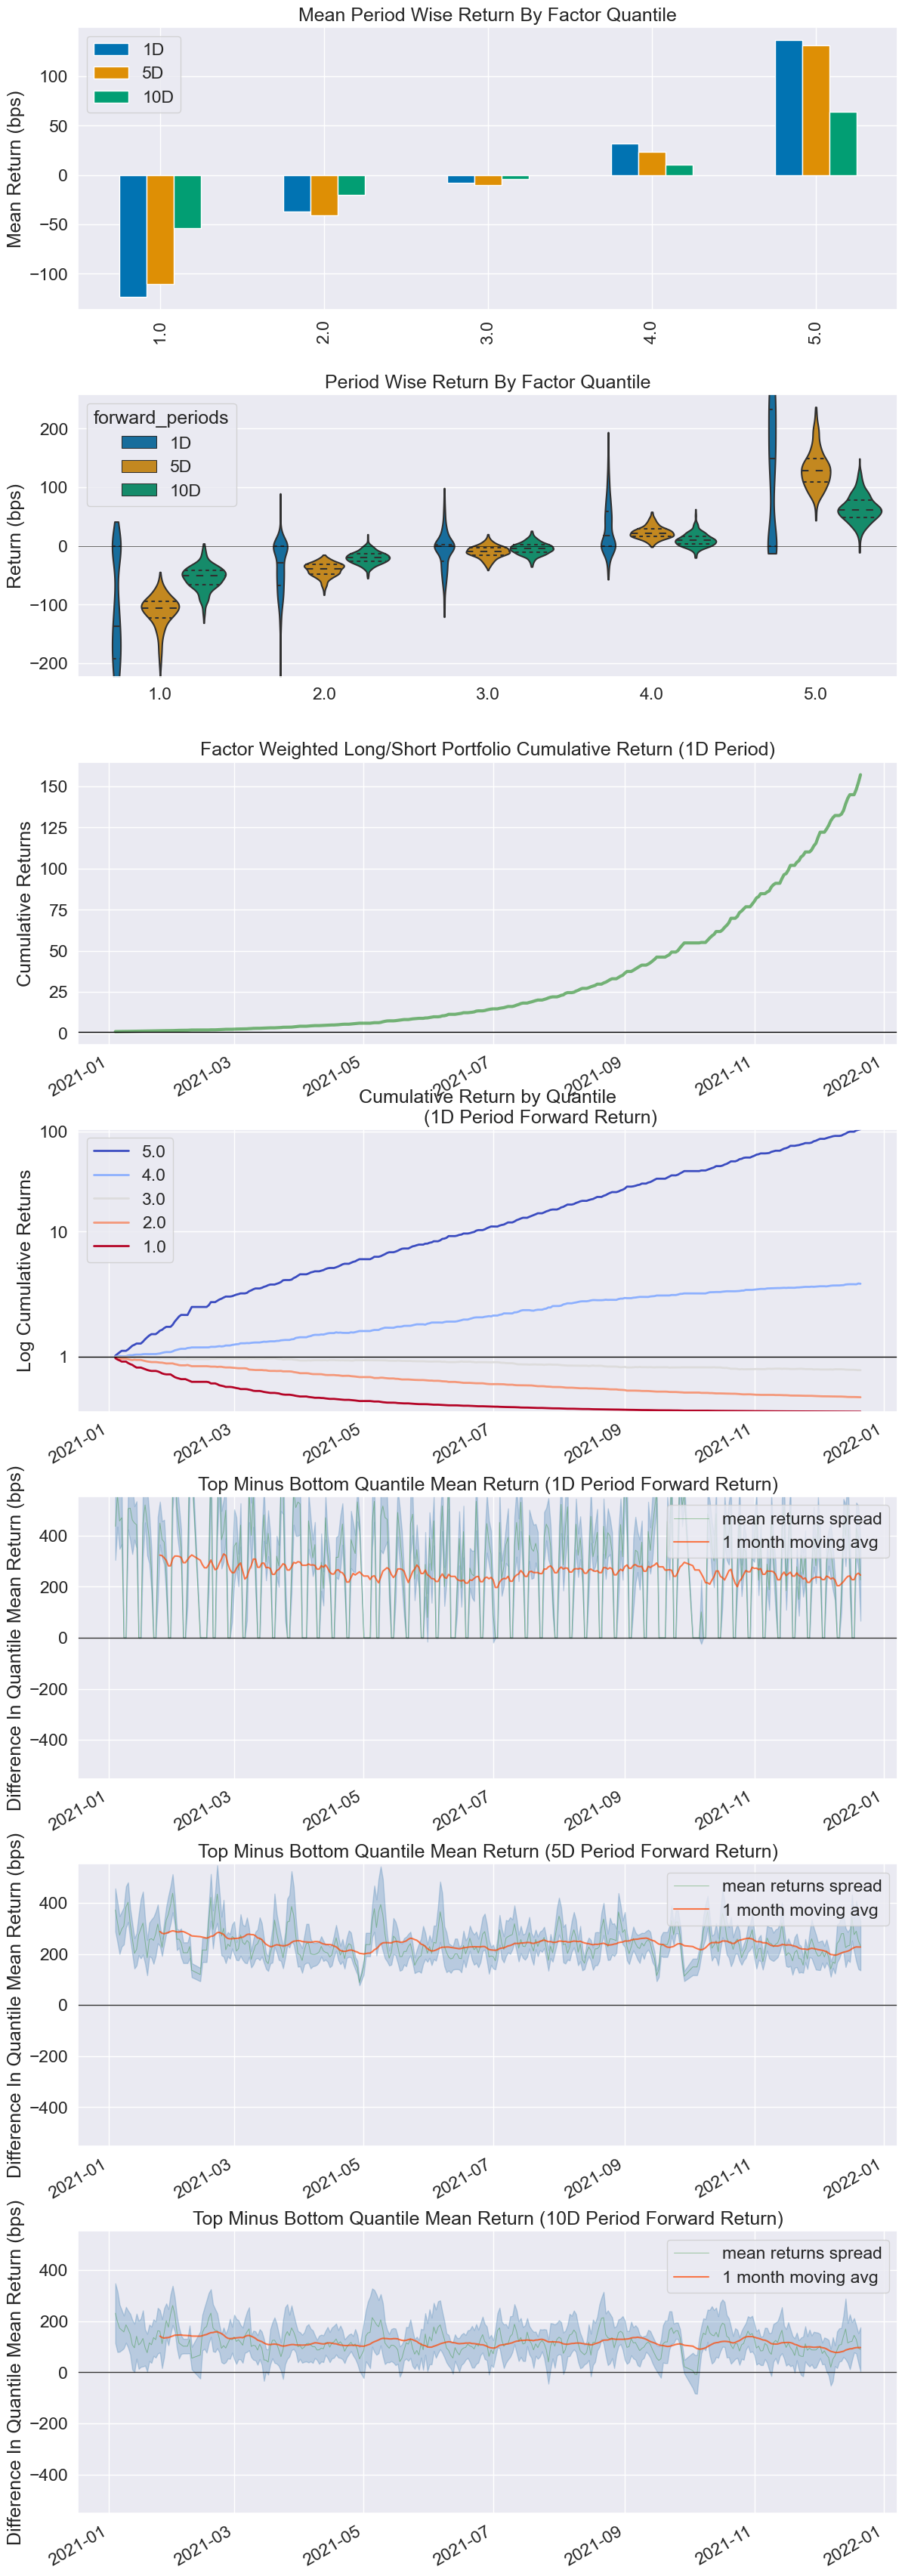

In [55]:
alphalens.tears.create_returns_tear_sheet(data1)

